**Analisando correlação entre os atributos**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


*Leitura do Arquivo*

In [2]:
#Leitura do arquivo
df = pd.read_pickle('../../df_filtrado.pickle')



In [7]:
df.head()

,AP_PRIPAL,AP_UFMUN,AP_CNSPCN,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_DTINIC,AP_DTFIM,...,FULVESTRANTO,VINORELBINA,GENCITABINA,GOSSERELINA,PAMIDRONATO,PERTUZUMABE,CISPLATINA,LEUPRORRELINA,ABREVIATURA_PROTOCOLO,Total_Medicamentos
918696,0304040029,SP,|{{~~ü|}|ä~{{{â,72,F,1,SP,Brasil,29/05/2009,31/07/2009,...,0,0,0,0,0,0,0,0,DOX,1
1073812,0304040029,SP,|{{~~ü|}|ä~{{{â,72,F,1,SP,Brasil,10/11/2009,31/01/2010,...,0,0,0,0,0,0,0,0,PTX,1
397157,0304040029,ES,|{{~é{ââ|ü{{{Ç,70,F,3,ES,Brasil,15/06/2021,31/08/2021,...,0,0,0,0,0,0,0,0,CFX,1
408520,0304040185,ES,|{{~é{ââ|ü{{{Ç,71,F,3,ES,Brasil,08/09/2021,30/11/2021,...,0,0,0,0,0,0,0,0,DTX,1
13567415,0304040029,RJ,|{{|éâÇ{{{Ç,60,F,2,RJ,Brasil,01/07/2010,30/09/2010,...,0,0,0,0,0,0,0,0,DOX+CFX+5FU,3


In [8]:
df.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'DESFECHO', 'CODIGO_6D', 'PACLITAXEL',
       'DOXORRUBICINA', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO',
       'EPIRRUBICINA', 'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO',
       'CAPECITABINA', 'LETROZOL', 'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO',
       'FULVESTRANTO', 'VINORELBINA', 'GENCITABINA', 'GOSSERELINA',
       'PAMIDRONATO', 'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'ABRE

*Convertendo campos de data para timestamp para poder fazer correlação*

In [3]:
# Convertendo a coluna de data para o tipo datetime
df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
df['INICIO'] = pd.to_datetime(df['INICIO'], errors='coerce')
df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')



# Convertendo a data para um timestamp numérico
df['AP_DTINIC'] = df['AP_DTINIC'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['AP_DTFIM'] = df['AP_DTFIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['INICIO'] = df['INICIO'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['FIM'] = df['FIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)




C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\3041570925.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\3041570925.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\3041570925.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')


In [4]:
# Ordena os casos por cns e data de fim (mais recentes por último)
df_ordenado = df.sort_values(by=['AP_CNSPCN', 'AP_DTFIM'])

# Pega o último caso de cada cns (o mais recente)
df_ultimos_casos = df_ordenado.groupby('AP_CNSPCN').tail(1)


df_ultimos_casos['AP_CNSPCN'].is_unique
print(f"Quantidade de valores únicos na coluna cns: {df_ultimos_casos['AP_CNSPCN'].is_unique}")



Quantidade de valores únicos na coluna cns: True


In [11]:
qtd_alta = (df_ultimos_casos['DESFECHO'] == 'Alta').sum()
print(f"Quantidade de Altas: {qtd_alta}")

total_linhas = len(df_ultimos_casos)
print(f"Total de linhas: {total_linhas}")

porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Alta').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Altas: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Melhora').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Melhoras: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Óbito').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Óbitos: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Piora').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Piora: {porcentagem_alta:.2f}%")
df_ultimos_casos['DESFECHO'].isnull().sum()
print(f"Quantidade de valores nulos na coluna DESFECHO: {df_ultimos_casos['DESFECHO'].isnull().sum()}")

df_ultimos_casos['AP_CNSPCN'].is_unique
print(f"Quantidade de valores únicos na coluna cns: {df_ultimos_casos['AP_CNSPCN'].is_unique}")

Quantidade de Altas: 13823
Total de linhas: 53743
Porcentagem de Altas: 25.72%
Porcentagem de Melhoras: 24.84%
Porcentagem de Óbitos: 7.61%
Porcentagem de Piora: 41.82%
Quantidade de valores nulos na coluna DESFECHO: 0
Quantidade de valores únicos na coluna cns: True


In [12]:
df_sem_altas = df[df['DESFECHO'] != 'Alta']

In [13]:
import pickle

dados_sem_alta = pickle.dumps(df)
with open('../../dados_sem_alta.pickle', 'wb') as arquivo:
    arquivo.write(dados_sem_alta)

*Trasnformando Variável Categórica em Numérica*

In [14]:
import numpy as np


def valor_desfecho(desfecho):
    if(desfecho=='Melhora'):
        return 1
    elif(desfecho=='Piora'):
        return 0
    elif(desfecho=='Óbito'):
        return 0


df_sem_altas['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_sem_altas['DESFECHO'])
df_sem_altas['VALOR_DESFECHO'].value_counts()
df_analise_valor = df_sem_altas.drop('DESFECHO', axis=1)

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_6568\2033463406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_altas['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_sem_altas['DESFECHO'])


In [15]:
porcentagem_favoravel = (df_sem_altas['VALOR_DESFECHO'] == 1).sum() / len(df_sem_altas) * 100
print(f"Porcentagem de Favoráveis: {porcentagem_favoravel:.2f}%")
porcentagem_desfavoravel = (df_sem_altas['VALOR_DESFECHO'] == 0).sum() / len(df_sem_altas) * 100
print(f"Porcentagem de Desfavoraveis: {porcentagem_desfavoravel:.2f}%")

Porcentagem de Favoráveis: 33.86%
Porcentagem de Desfavoraveis: 66.14%


In [16]:
import pickle

dados_sem_altas = pickle.dumps(df_sem_altas)
with open('../../dados_sem_alta_favoravel_desfavoravel.pickle', 'wb') as arquivo:
    arquivo.write(dados_sem_altas)

In [16]:
df_analise_valor.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'ABREVIATURA_PROTOCOLO',

*Usando One-Hot Encoding nas colunas de Localidade*

In [17]:
# Usando pd.get_dummies para fazer One-Hot Encoding
df_analise = pd.get_dummies(df_analise_valor, columns=['AP_UFMUN'], drop_first=False)

# Verificando se existem NaN nas colunas de One-Hot Encoding
print(df_analise.isna().sum())

# Preenchendo NaN com 0 antes de converter para inteiro
df_analise.fillna(0, inplace=True)

# Lista das colunas criadas pelo One-Hot Encoding
one_hot_columns = ['AP_UFMUN_ES', 'AP_UFMUN_MG', 'AP_UFMUN_RJ', 'AP_UFMUN_SP']

# Convertendo as colunas One-Hot Encoding para inteiros
df_analise[one_hot_columns] = df_analise[one_hot_columns].astype(int)

# Mostrando o DataFrame resultante
print(df_analise)


AP_PRIPAL         0
AP_CNSPCN         0
AP_NUIDADE        0
AP_SEXO           0
AP_RACACOR        0
                 ..
VALOR_DESFECHO    0
AP_UFMUN_ES       0
AP_UFMUN_MG       0
AP_UFMUN_RJ       0
AP_UFMUN_SP       0
Length: 61, dtype: int64
           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{ü

In [18]:
# Verificando os valores únicos na coluna 'PROCEDIMENTO_INICIAL'
valores_unicos = df_analise['AP_PRIPAL'].unique()
print(f'Valores únicos na coluna AP_PRIPAL: {valores_unicos}')

df_analise_valor = df_analise


Valores únicos na coluna AP_PRIPAL: ['0304040029' '0304040185' '0304040037' '0304040193' '0304040088'
 '0304040150' '0304040010' '0304040142' '0304040070']


In [19]:
# Certifique-se de que as colunas estão corretamente selecionadas
df_encoded = pd.get_dummies(df_analise_valor['AP_PRIPAL'], prefix='AP_PRIPAL', drop_first=False)

# Concatenando as novas colunas com o DataFrame original
df_analise_valor = pd.concat([df_analise_valor, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise_valor)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          46       F           1   
408788    0304040029  é{üü{üÇü}üééä|{          36       F           3   

         AP_MUNPCN AP_UFNACIO     AP_DTINIC      AP_DTFIM  AP_MOTSAI  ...  \
918696          SP     Brasil  1.243555e+09  1

In [20]:
# Certifique-se de que as colunas estão corretamente selecionadas
df_encoded = pd.get_dummies(df_analise_valor['PROCEDIMENTO_INICIAL'], prefix='PROCEDIMENTO_INICIAL')

# Concatenando as novas colunas com o DataFrame original
df_analise = pd.concat([df_analise_valor, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          46       F           1   
408788    0304040029  é{üü{üÇü}üééä|{          36       F           3   

         AP_MUNPCN AP_UFNACIO     AP_DTINIC      AP_DTFIM  AP_MOTSAI  ...  \
918696          SP     Brasil  1.243555e+09  1

*Transformando colunas em numéricas*

In [21]:
# Caso haja mais colunas, aplique a transformação a elas
colunas_categoricas = ['AQ_CONTTR', 'AQ_LINFIN', 'AQ_TRANTE']  # Colunas com valores 'S' e 'N'
for col in colunas_categoricas:
    df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})




C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\2655021700.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})


In [22]:
df_analise.columns

Index(['AP_PRIPAL', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO', 'AP_RACACOR',
       'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM', 'AP_MOTSAI',
       'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN', 'AQ_ESTADI',
       'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'ABREVIATURA_PROTOCOLO',
       'Tot

In [23]:
# Usar to_string para evitar truncamento na visualização
print(df_analise.iloc[0].to_string())


AP_PRIPAL                                 0304040029
AP_CNSPCN                            |{{~~ü|}|ä~{{{â
AP_NUIDADE                                        72
AP_SEXO                                            F
AP_RACACOR                                         1
AP_MUNPCN                                         SP
AP_UFNACIO                                    Brasil
AP_DTINIC                               1243555200.0
AP_DTFIM                                1248998400.0
AP_MOTSAI                                         21
AP_TRANSF                                          0
AP_CIDCAS                                       0000
AP_CIDSEC                                       C501
AQ_LINFIN                                          1
AQ_ESTADI                                          3
AQ_GRAHIS                                          2
AQ_TRANTE                                          0
AQ_CONTTR                                          1
AP_APACANT                                    

In [24]:
df_analise.dtypes

AP_PRIPAL                         object
AP_CNSPCN                         object
AP_NUIDADE                         int64
AP_SEXO                           object
AP_RACACOR                         int64
                                   ...  
PROCEDIMENTO_INICIAL_304040037      bool
PROCEDIMENTO_INICIAL_304040070      bool
PROCEDIMENTO_INICIAL_304040142      bool
PROCEDIMENTO_INICIAL_304040185      bool
PROCEDIMENTO_INICIAL_304040193      bool
Length: 86, dtype: object

**Remoção de Atributos Altamente Correlacionados (evitar redundância)**

In [25]:
df_matrix_clinica = df_analise[['AP_NUIDADE',
       'AP_RACACOR', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AQ_LINFIN',
       'AQ_ESTADI',  'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA',
       'TOTAL_TRATAMENTOS', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'Total_Medicamentos', 'VALOR_DESFECHO','AP_UFMUN_ES', 'AP_UFMUN_MG',
       'AP_UFMUN_RJ', 'AP_UFMUN_SP', 'AP_PRIPAL_0304040010',
       'AP_PRIPAL_0304040029', 'AP_PRIPAL_0304040037', 'AP_PRIPAL_0304040070',
       'AP_PRIPAL_0304040088', 'AP_PRIPAL_0304040142', 'AP_PRIPAL_0304040150',
       'AP_PRIPAL_0304040185', 'AP_PRIPAL_0304040193',
       'PROCEDIMENTO_INICIAL_304020133', 'PROCEDIMENTO_INICIAL_304020141',
       'PROCEDIMENTO_INICIAL_304020338', 'PROCEDIMENTO_INICIAL_304020346',
       'PROCEDIMENTO_INICIAL_304020354', 'PROCEDIMENTO_INICIAL_304020419',
       'PROCEDIMENTO_INICIAL_304020427', 'PROCEDIMENTO_INICIAL_304020435',
       'PROCEDIMENTO_INICIAL_304020443', 'PROCEDIMENTO_INICIAL_304040010',
       'PROCEDIMENTO_INICIAL_304040029', 'PROCEDIMENTO_INICIAL_304040037',
       'PROCEDIMENTO_INICIAL_304040070', 'PROCEDIMENTO_INICIAL_304040142',
       'PROCEDIMENTO_INICIAL_304040185', 'PROCEDIMENTO_INICIAL_304040193'              
]]



*Transformando colunas em tipo inteiro*

In [26]:
df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')

# Converter para inteiro
df_matrix_clinica['AQ_LINFIN'] = df_matrix_clinica['AQ_LINFIN'].astype('int')
df_matrix_clinica['AQ_TRANTE'] = df_matrix_clinica['AQ_TRANTE'].astype('int')

df_matrix_clinica.fillna(0, inplace=True)  # Preencher NaN com 0, ou use outro valor se necessário


C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\3559135671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\3559135671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\3559135671.py:5: SettingWithCopyWarning: 

In [27]:
# Usar to_string para evitar truncamento na visualização
print(df_matrix_clinica.iloc[0].to_string())

AP_NUIDADE                                     72
AP_RACACOR                                      1
AP_DTINIC                            1243555200.0
AP_DTFIM                             1248998400.0
AP_MOTSAI                                      21
AP_TRANSF                                       0
AQ_LINFIN                                       1
AQ_ESTADI                                       3
AQ_TRANTE                                       0
AQ_CONTTR                                       1
AP_APACANT                                      0
NUMERO_DE_TRATAMENTOS_ANTERIORES                0
NUMERO_DE_DIAGNOSTICOS_DIFERENTES               1
TEM_CAUSAS_ASSOCIADAS                           1
TEM_CAUSAS_SECUNDARIA                           1
TOTAL_TRATAMENTOS                               2
PACLITAXEL                                      0
DOXORRUBICINA                                   1
CICLOFOSFAMIDA                                  0
FLUOROURACILA                                   0


*Matriz de Correlação*

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\410573254.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_matrix = corr_matrix.replace({True: 1, False: 0})


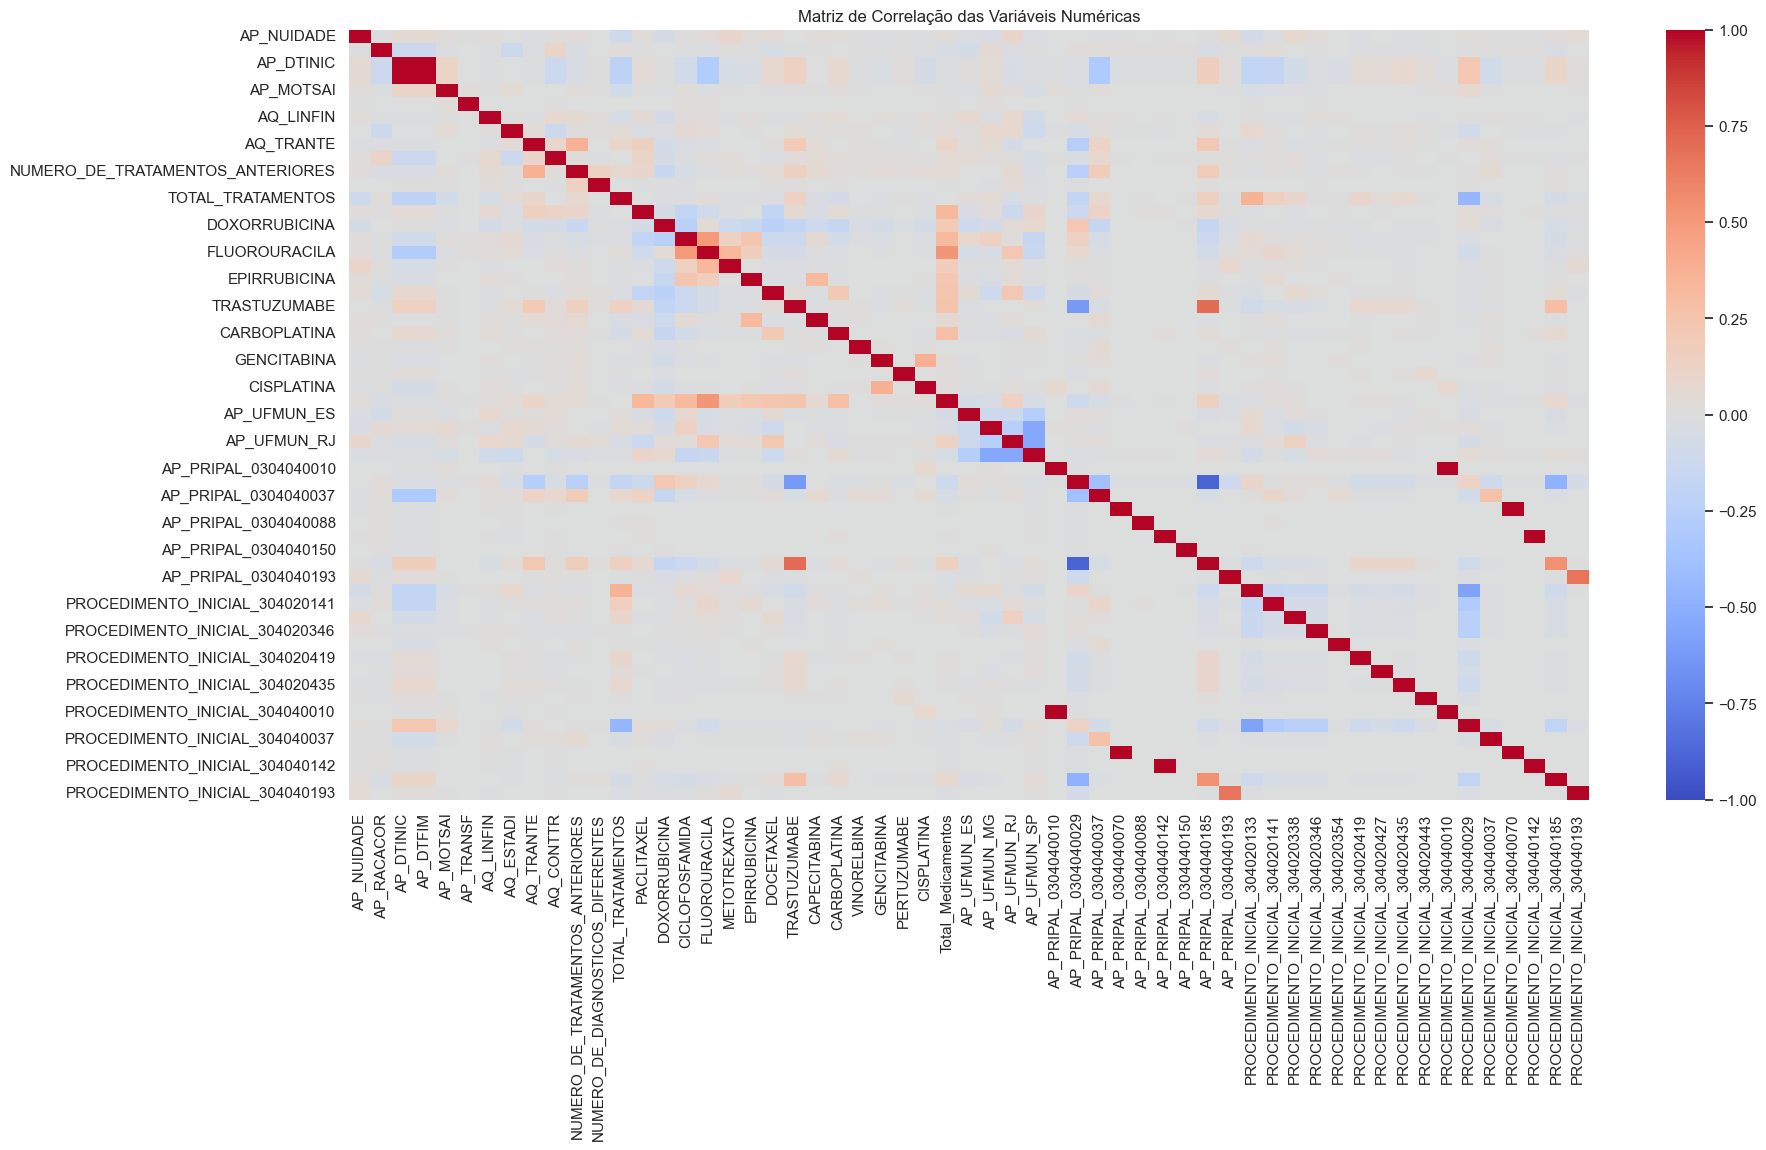

In [222]:
corr_matrix = df_matrix_clinica.drop(columns=['VALOR_DESFECHO']) 

# Converte True/False para 1/0 antes da seleção numérica
corr_matrix = corr_matrix.replace({True: 1, False: 0})

# Manter apenas colunas numéricas
numeric_df = corr_matrix.select_dtypes(include=['number'])

# Remover colunas com desvio padrão zero
numeric_df = numeric_df.loc[:, numeric_df.std() != 0]

# Calcular a matriz de correlação
corr = numeric_df.corr()

# Remover linhas/colunas completamente NaN (opcional)
corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plotar
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


In [223]:
# Colunas numéricas antes do filtro
all_numeric = corr_matrix.select_dtypes(include=['number']).columns

# Colunas mantidas após remoção de constantes
filtered_numeric = numeric_df.columns

# Colunas excluídas
excluded = list(set(all_numeric) - set(filtered_numeric))
print("Colunas excluídas por serem constantes:", excluded)


Colunas excluídas por serem constantes: ['FULVESTRANTO', 'TAMOXIFENO', 'LEUPRORRELINA', 'EXEMESTANO', 'GOSSERELINA', 'PAMIDRONATO', 'TEM_CAUSAS_ASSOCIADAS', 'ANASTROZOL', 'LETROZOL', 'TEM_CAUSAS_SECUNDARIA']


Ganho de informação

In [224]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Separa features (X) e alvo (y)
X = df_matrix_clinica.drop('VALOR_DESFECHO', axis=1).copy()
y = df_matrix_clinica['VALOR_DESFECHO']

# Codifica variáveis categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Calcula o ganho de informação 
importancias = mutual_info_classif(X, y, discrete_features=True)

# Cria um DataFrame com os resultados
importancia_df = pd.DataFrame({
    'Variável': X.columns,
    'Ganho de Informação': importancias
}).sort_values(by='Ganho de Informação', ascending=False)

print(importancia_df)


                          Variável  Ganho de Informação
2                        AP_DTINIC             0.133705
3                         AP_DTFIM             0.081988
62  PROCEDIMENTO_INICIAL_304040029             0.039949
42                     AP_UFMUN_SP             0.028414
40                     AP_UFMUN_MG             0.023372
..                             ...                  ...
30                    FULVESTRANTO             0.000000
26                        LETROZOL             0.000000
24                      TAMOXIFENO             0.000000
27                      ANASTROZOL             0.000000
37                   LEUPRORRELINA             0.000000

[68 rows x 2 columns]


In [225]:
print(importancia_df.to_string())


                             Variável  Ganho de Informação
2                           AP_DTINIC         1.337050e-01
3                            AP_DTFIM         8.198776e-02
62     PROCEDIMENTO_INICIAL_304040029         3.994864e-02
42                        AP_UFMUN_SP         2.841442e-02
40                        AP_UFMUN_MG         2.337221e-02
52     PROCEDIMENTO_INICIAL_304020133         2.116933e-02
10                         AP_APACANT         1.817536e-02
15                  TOTAL_TRATAMENTOS         1.589978e-02
4                           AP_MOTSAI         1.551393e-02
7                           AQ_ESTADI         1.347203e-02
53     PROCEDIMENTO_INICIAL_304020141         9.824476e-03
19                      FLUOROURACILA         3.304003e-03
38                 Total_Medicamentos         2.668605e-03
41                        AP_UFMUN_RJ         2.596363e-03
55     PROCEDIMENTO_INICIAL_304020346         2.105357e-03
1                          AP_RACACOR         1.846702e-

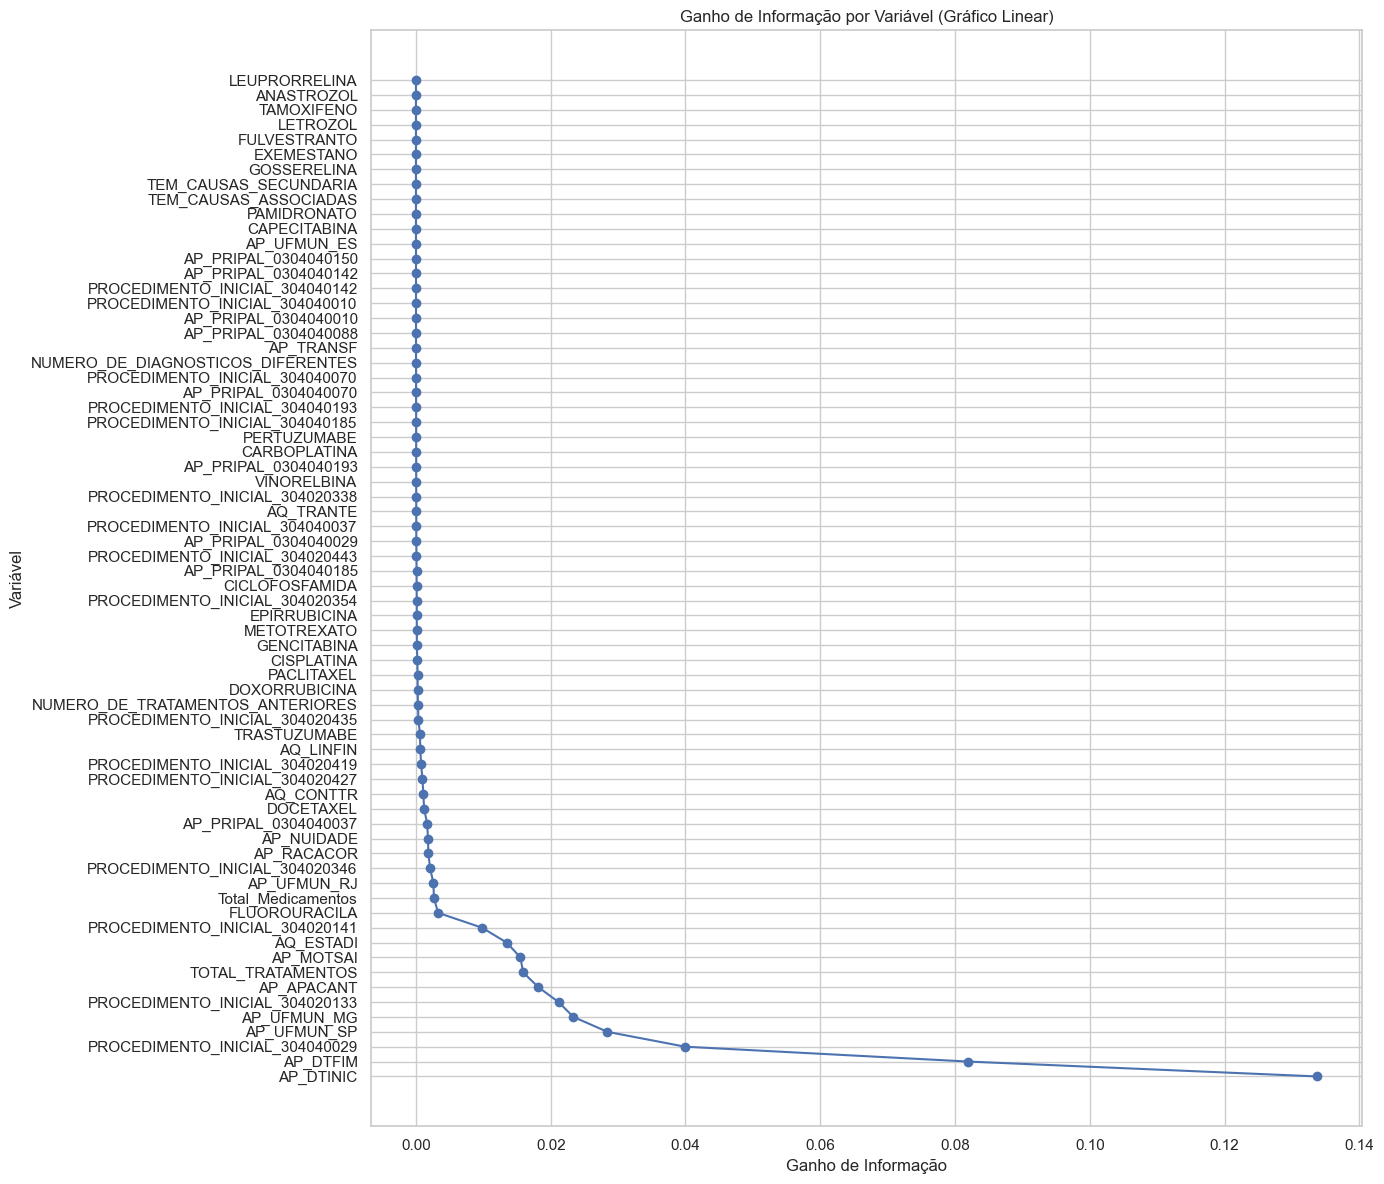

In [226]:


plt.figure(figsize=(14, 12))
plt.plot(importancia_df['Ganho de Informação'], importancia_df['Variável'], marker='o', linestyle='-')
plt.xlabel('Ganho de Informação')
plt.ylabel('Variável')
plt.title('Ganho de Informação por Variável (Gráfico Linear)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [227]:
from sklearn.preprocessing import StandardScaler


# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(corr_matrix)



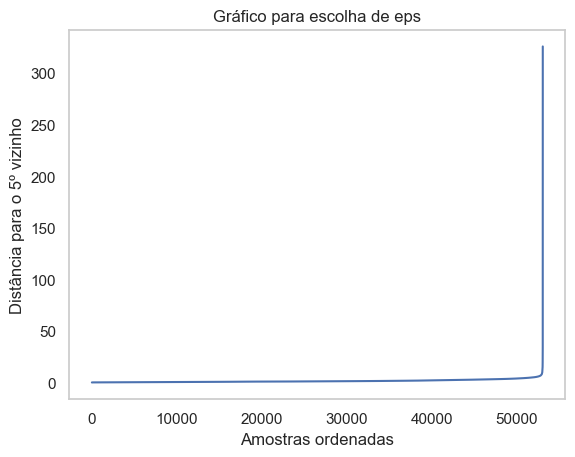

In [228]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])  # 5º vizinho
plt.plot(distances)
plt.title("Gráfico para escolha de eps")
plt.xlabel("Amostras ordenadas")
plt.ylabel("Distância para o 5º vizinho")
plt.grid()
plt.show()


In [229]:
from kneed import KneeLocator

knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
print(f"eps sugerido pelo KneeLocator: {distances[knee.knee]:.2f}")


eps sugerido pelo KneeLocator: 9.04


In [149]:
from sklearn.decomposition import PCA

# Reduz para 10 dimensões
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


In [150]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=9.04, min_samples=10)
labels = dbscan.fit_predict(X_pca)


In [151]:
import numpy as np

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = np.sum(labels == -1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de outliers: {n_outliers}")


Número de clusters encontrados: 3
Número de outliers: 3


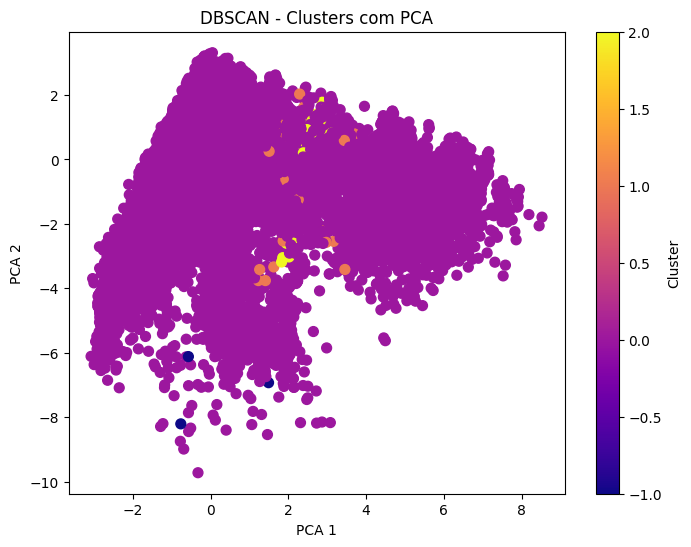

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN - Clusters com PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [156]:
# Lista das 12 variáveis mais importantes
variaveis_mais_importantes = [
    'AP_DTINIC',
    'AP_DTFIM',
    'PROCEDIMENTO_INICIAL_304040029',
    'AP_UFMUN_SP',
    'AP_UFMUN_MG',
    'PROCEDIMENTO_INICIAL_304020133',
    'AP_APACANT',
    'TOTAL_TRATAMENTOS',
    'AP_MOTSAI',
    'AQ_ESTADI',
    'PROCEDIMENTO_INICIAL_304020141',
    'FLUOROURACILA'
]

# Remove 'VALOR_DESFECHO' e filtra apenas as variáveis importantes
X_filtrado = df_matrix_clinica.drop(columns=['VALOR_DESFECHO'])[variaveis_mais_importantes].copy()

# Verifica
print("Shape final:", X_filtrado.shape)
print("Colunas selecionadas:", X_filtrado.columns.tolist())


Shape final: (53104, 12)
Colunas selecionadas: ['AP_DTINIC', 'AP_DTFIM', 'PROCEDIMENTO_INICIAL_304040029', 'AP_UFMUN_SP', 'AP_UFMUN_MG', 'PROCEDIMENTO_INICIAL_304020133', 'AP_APACANT', 'TOTAL_TRATAMENTOS', 'AP_MOTSAI', 'AQ_ESTADI', 'PROCEDIMENTO_INICIAL_304020141', 'FLUOROURACILA']


In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtrado)

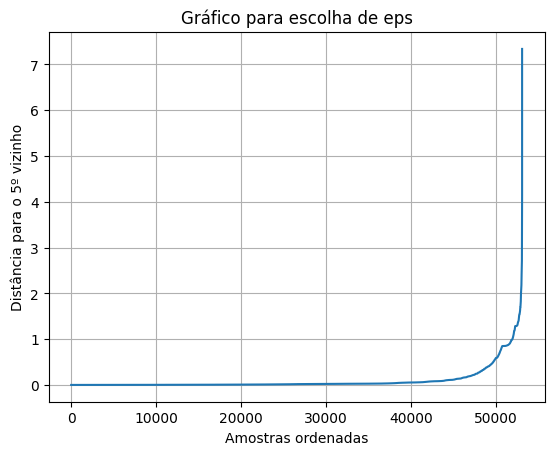

In [158]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled_filtered)
distances, indices = nbrs.kneighbors(X_scaled_filtered)

distances = np.sort(distances[:, 4])  # 5º vizinho
plt.plot(distances)
plt.title("Gráfico para escolha de eps")
plt.xlabel("Amostras ordenadas")
plt.ylabel("Distância para o 5º vizinho")
plt.grid()
plt.show()


In [159]:
from kneed import KneeLocator

knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
print(f"eps sugerido pelo KneeLocator: {distances[knee.knee]:.2f}")


eps sugerido pelo KneeLocator: 3.01


In [230]:
from sklearn.cluster import DBSCAN
import numpy as np

def testar_parametros_dbscan(X, eps_values, min_samples_values):
    """
    Testa diferentes combinações de eps e min_samples para DBSCAN.

    Parâmetros:
        X: ndarray ou DataFrame (já escalado!)
        eps_values: lista de valores de eps (ex: [2.5, 3.0, 3.5])
        min_samples_values: lista de min_samples (ex: [5, 10, 15])
    """
    print(f"{'eps':<6} {'min_samples':<12} {'clusters':<10} {'outliers'}")
    print("-" * 40)
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_outliers = list(labels).count(-1)
            
            print(f"{eps:<6.2f} {min_samples:<12} {n_clusters:<10} {n_outliers}")


In [165]:
# Supondo que você já tenha X_scaled_filtered
eps_testes = [2.5, 3.0, 3.5, 4.0]
min_samples_testes = [5, 10, 15]

testar_parametros_dbscan(X_scaled_filtered, eps_testes, min_samples_testes)


eps    min_samples  clusters   outliers
----------------------------------------
2.50   5            13         25
2.50   10           10         57
2.50   15           8          89
3.00   5            12         9
3.00   10           12         16
3.00   15           8          62
3.50   5            12         5
3.50   10           11         10
3.50   15           8          53
4.00   5            5          1
4.00   10           4          6
4.00   15           4          7


In [234]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4.00, min_samples=10)
labels = dbscan.fit_predict(X_scaled_filtered)


In [235]:
import numpy as np

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = np.sum(labels == -1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de outliers: {n_outliers}")


Número de clusters encontrados: 4
Número de outliers: 6


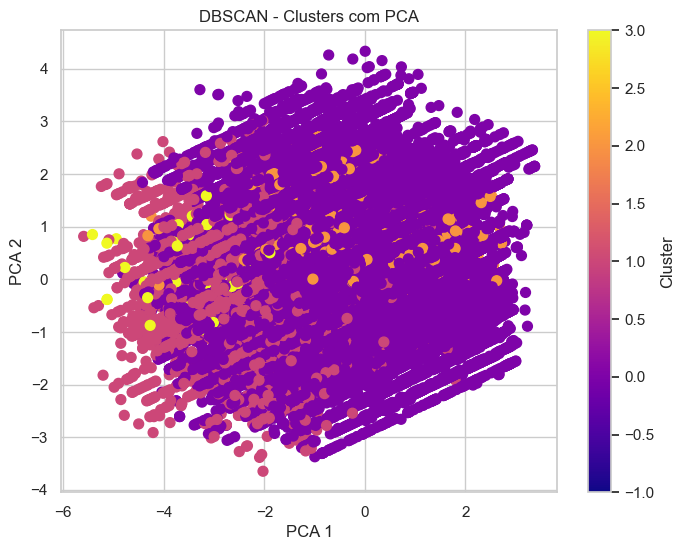

In [236]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN - Clusters com PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


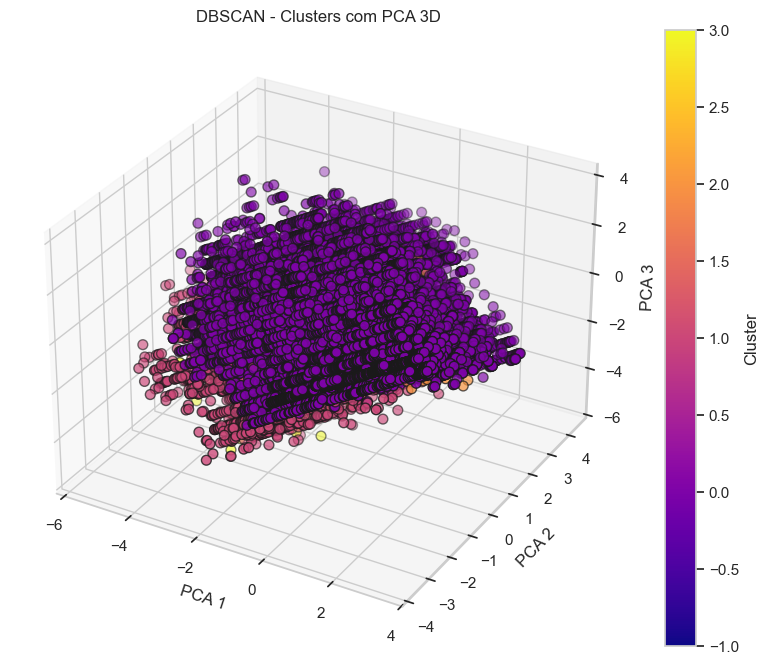

In [237]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA com 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_filtered)

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels,
    cmap='plasma',
    s=50,
    edgecolor='k'
)

ax.set_title("DBSCAN - Clusters com PCA 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
fig.colorbar(scatter, label="Cluster")
plt.show()


In [238]:
import plotly.express as px
import pandas as pd

# Supondo que labels e X_pca já estão definidos
df_plot = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'PCA3': X_pca[:, 2],
    'cluster': labels.astype(str)  # converte pra string pra ficar como categoria
})

fig = px.scatter_3d(
    df_plot, x='PCA1', y='PCA2', z='PCA3',
    color='cluster',
    title='DBSCAN - Clusters com PCA 3D',
    labels={'cluster': 'Cluster'},
    opacity=0.8,
    width=800,
    height=600
)

fig.show()


In [174]:
# Lista das variáveis + alvo + cluster
colunas_final = variaveis_mais_importantes + ['VALOR_DESFECHO']

# Cria novo DataFrame com apenas as colunas desejadas
df_com_cluster = df_matrix_clinica[colunas_final].copy()

# Adiciona a coluna com os rótulos de cluster
df_com_cluster['cluster'] = labels

# Verifica
print(df_com_cluster.head())


             AP_DTINIC      AP_DTFIM  PROCEDIMENTO_INICIAL_304040029  \
918696    1.243555e+09  1.248998e+09                            True   
1073812   1.257811e+09  1.264896e+09                            True   
397157    1.623715e+09  1.630368e+09                            True   
408520    1.631059e+09  1.638230e+09                            True   
13567415  1.277942e+09  1.285805e+09                           False   

          AP_UFMUN_SP  AP_UFMUN_MG  PROCEDIMENTO_INICIAL_304020133 AP_APACANT  \
918696              1            0                           False          0   
1073812             1            0                           False          0   
397157              0            0                           False          0   
408520              0            0                           False          0   
13567415            0            0                           False          0   

          TOTAL_TRATAMENTOS  AP_MOTSAI  AQ_ESTADI  \
918696                    2

In [175]:
# Lista das colunas de procedimentos
colunas_procedimentos = [col for col in df_com_cluster.columns if col.startswith('PROCEDIMENTO_INICIAL_')]

# Calcula a proporção (média) de pacientes com cada procedimento, por cluster
resumo_procedimentos_por_cluster = df_com_cluster.groupby('cluster')[colunas_procedimentos].mean() * 100

# Arredonda para facilitar leitura
resumo_procedimentos_por_cluster = resumo_procedimentos_por_cluster.round(1)

# Mostra
print(resumo_procedimentos_por_cluster)


         PROCEDIMENTO_INICIAL_304040029  PROCEDIMENTO_INICIAL_304020133  \
cluster                                                                   
-1                                  0.0                             0.0   
 0                                 51.8                            23.7   
 1                                 32.5                            31.2   
 2                                 39.5                            20.4   
 3                                 28.3                            33.3   

         PROCEDIMENTO_INICIAL_304020141  
cluster                                  
-1                                100.0  
 0                                  7.0  
 1                                 17.8  
 2                                 13.0  
 3                                 20.0  


In [176]:
# Para cada cluster, mostra os procedimentos com maior proporção
for cluster_id, linha in resumo_procedimentos_por_cluster.iterrows():
    print(f"\n📊 Cluster {cluster_id} — Procedimentos mais frequentes:")
    print(linha.sort_values(ascending=False).head(5))



📊 Cluster -1 — Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304020141    100.0
PROCEDIMENTO_INICIAL_304040029      0.0
PROCEDIMENTO_INICIAL_304020133      0.0
Name: -1, dtype: float64

📊 Cluster 0 — Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304040029    51.8
PROCEDIMENTO_INICIAL_304020133    23.7
PROCEDIMENTO_INICIAL_304020141     7.0
Name: 0, dtype: float64

📊 Cluster 1 — Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304040029    32.5
PROCEDIMENTO_INICIAL_304020133    31.2
PROCEDIMENTO_INICIAL_304020141    17.8
Name: 1, dtype: float64

📊 Cluster 2 — Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304040029    39.5
PROCEDIMENTO_INICIAL_304020133    20.4
PROCEDIMENTO_INICIAL_304020141    13.0
Name: 2, dtype: float64

📊 Cluster 3 — Procedimentos mais frequentes:
PROCEDIMENTO_INICIAL_304020133    33.3
PROCEDIMENTO_INICIAL_304040029    28.3
PROCEDIMENTO_INICIAL_304020141    20.0
Name: 3, dtype: float64


In [177]:
# Estatísticas básicas por cluster
resumo_desfecho = df_com_cluster.groupby('cluster')['VALOR_DESFECHO'].describe().round(2)

print(resumo_desfecho)


           count  mean   std  min   25%  50%  75%  max
cluster                                               
-1           6.0  0.67  0.52  0.0  0.25  1.0  1.0  1.0
 0       49983.0  0.35  0.48  0.0  0.00  0.0  1.0  1.0
 1        2394.0  0.18  0.38  0.0  0.00  0.0  0.0  1.0
 2         661.0  0.29  0.45  0.0  0.00  0.0  1.0  1.0
 3          60.0  0.03  0.18  0.0  0.00  0.0  0.0  1.0


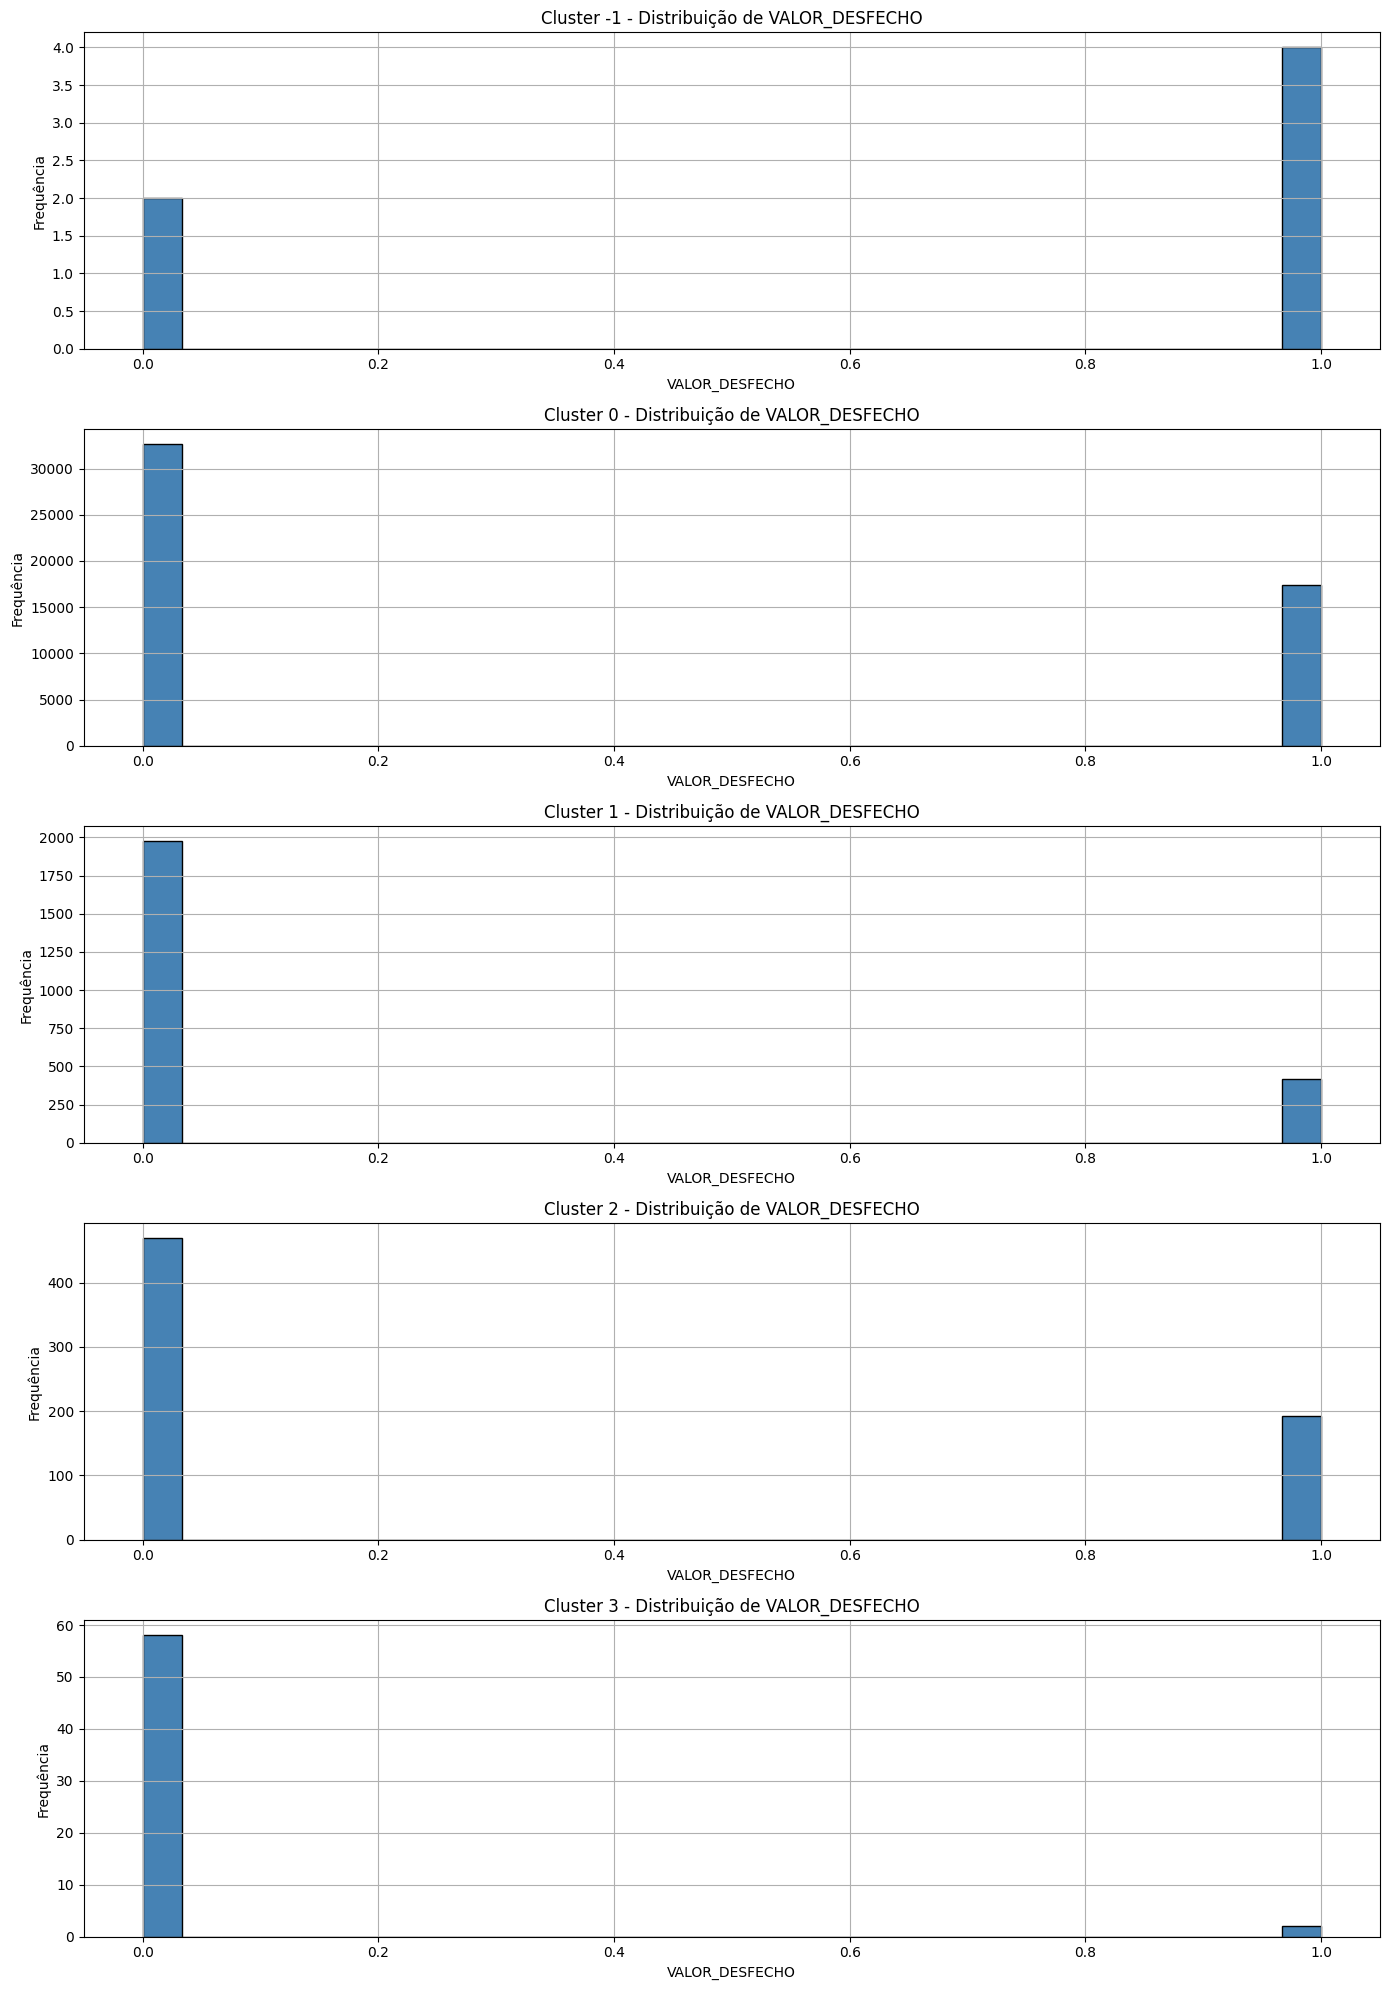

In [180]:
import matplotlib.pyplot as plt

clusters_unicos = df_com_cluster['cluster'].unique()
n_clusters = len(clusters_unicos)

plt.figure(figsize=(14, 4 * n_clusters))

for i, c in enumerate(sorted(clusters_unicos)):
    plt.subplot(n_clusters, 1, i + 1)
    subset = df_com_cluster[df_com_cluster['cluster'] == c]
    plt.hist(subset['VALOR_DESFECHO'], bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Cluster {c} - Distribuição de VALOR_DESFECHO')
    plt.xlabel('VALOR_DESFECHO')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.show()


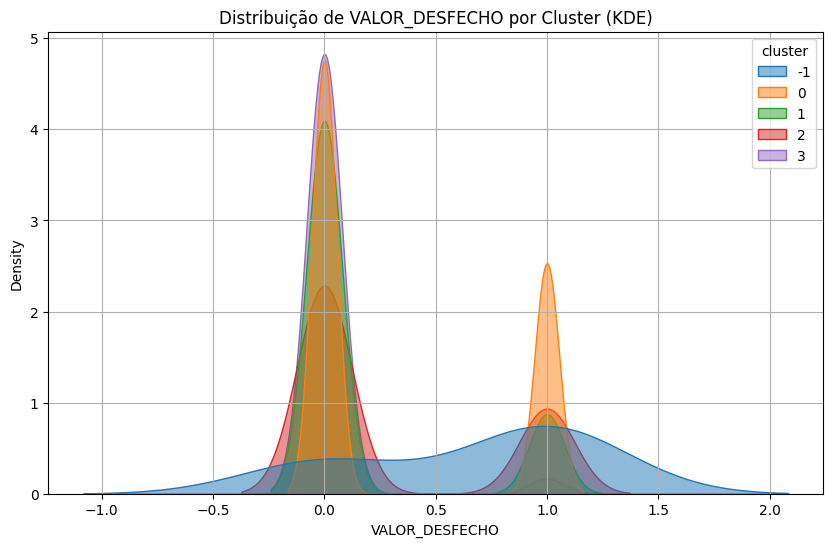

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_com_cluster,
    x='VALOR_DESFECHO',
    hue='cluster',
    fill=True,
    common_norm=False,
    palette='tab10',
    alpha=0.5
)
plt.title("Distribuição de VALOR_DESFECHO por Cluster (KDE)")
plt.xlabel("VALOR_DESFECHO")
plt.grid(True)
plt.show()


C:\Users\Rafael\AppData\Local\Temp\ipykernel_11952\1566792469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_com_cluster, x='cluster', y='VALOR_DESFECHO', palette='Set3', inner='quartile')


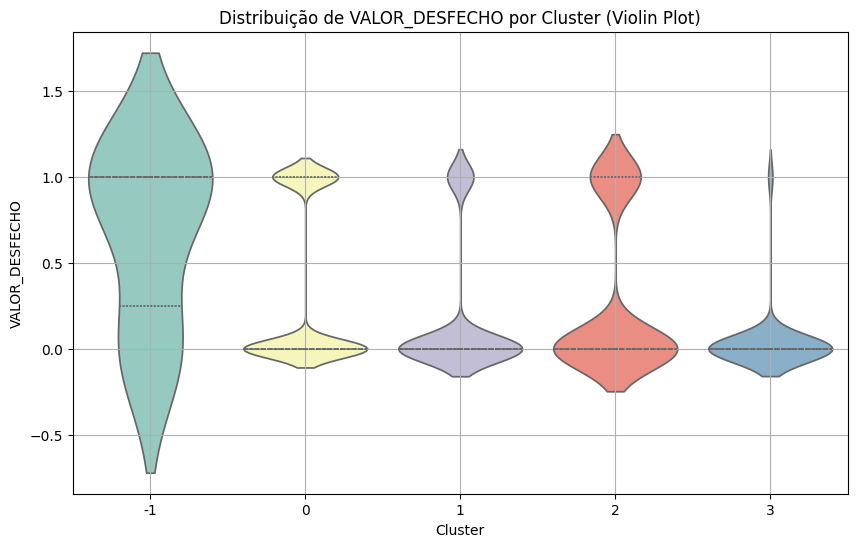

In [182]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_com_cluster, x='cluster', y='VALOR_DESFECHO', palette='Set3', inner='quartile')
plt.title("Distribuição de VALOR_DESFECHO por Cluster (Violin Plot)")
plt.xlabel("Cluster")
plt.ylabel("VALOR_DESFECHO")
plt.grid(True)
plt.show()


In [183]:
procedimentos = [col for col in df_com_cluster.columns if col.startswith("PROCEDIMENTO_INICIAL_")]

# Para cada procedimento, calcular a média do desfecho onde foi aplicado
media_desfecho_por_procedimento = {
    proc: df_com_cluster[df_com_cluster[proc] == 1]['VALOR_DESFECHO'].mean()
    for proc in procedimentos
}

# Converter em DataFrame
import pandas as pd

df_procedimento_desfecho = pd.DataFrame.from_dict(
    media_desfecho_por_procedimento, orient='index', columns=['media_valor_desfecho']
).sort_values(by='media_valor_desfecho', ascending=False)

print(df_procedimento_desfecho)


                                media_valor_desfecho
PROCEDIMENTO_INICIAL_304040029              0.468832
PROCEDIMENTO_INICIAL_304020133              0.172270
PROCEDIMENTO_INICIAL_304020141              0.124907


In [184]:
# Agrupa por cluster e procedimento, calcula média do desfecho
resultados = []

for proc in procedimentos:
    agrupado = df_com_cluster[df_com_cluster[proc] == 1].groupby('cluster')['VALOR_DESFECHO'].mean()
    for cluster, media in agrupado.items():
        resultados.append({
            'procedimento': proc,
            'cluster': cluster,
            'media_valor_desfecho': round(media, 2)
        })

df_proc_cluster_desfecho = pd.DataFrame(resultados)


In [185]:
# Ver top 10 custos médios por procedimento + cluster
df_proc_cluster_desfecho.sort_values(by='media_valor_desfecho', ascending=False).head(10)


,procedimento,cluster,media_valor_desfecho
8,PROCEDIMENTO_INICIAL_304020141,-1,0.67
2,PROCEDIMENTO_INICIAL_304040029,2,0.49
0,PROCEDIMENTO_INICIAL_304040029,0,0.47
1,PROCEDIMENTO_INICIAL_304040029,1,0.27
4,PROCEDIMENTO_INICIAL_304020133,0,0.18
10,PROCEDIMENTO_INICIAL_304020141,1,0.15
3,PROCEDIMENTO_INICIAL_304040029,3,0.12
9,PROCEDIMENTO_INICIAL_304020141,0,0.12
11,PROCEDIMENTO_INICIAL_304020141,2,0.07
5,PROCEDIMENTO_INICIAL_304020133,1,0.06


In [186]:
df_com_cluster['estado'] = df_com_cluster[['AP_UFMUN_SP', 'AP_UFMUN_MG']].idxmax(axis=1).str[-2:]

media_por_estado_cluster = df_com_cluster.groupby(['estado', 'cluster'])['VALOR_DESFECHO'].mean().unstack().round(2)
print(media_por_estado_cluster)


cluster    -1     0     1     2     3
estado                               
MG        NaN  0.56  0.15   NaN   NaN
SP       0.67  0.29  0.18  0.29  0.03


In [187]:
media_por_estadiamento = df_com_cluster.groupby(['AQ_ESTADI', 'cluster'])['VALOR_DESFECHO'].mean().unstack().round(2)
print(media_por_estadiamento)


cluster     -1     0     1     2     3
AQ_ESTADI                             
0          NaN  0.07  0.02  0.00  0.00
1          0.0  0.16  0.18  0.12   NaN
2          NaN  0.41  0.26  0.22  0.00
3          0.8  0.36  0.17  0.30  0.04
4          NaN  0.29  0.21  0.36  0.00


Média do VALOR_DESFECHO por Fluorouracila:
 FLUOROURACILA
0    0.346628
1    0.173241
Name: VALOR_DESFECHO, dtype: float64


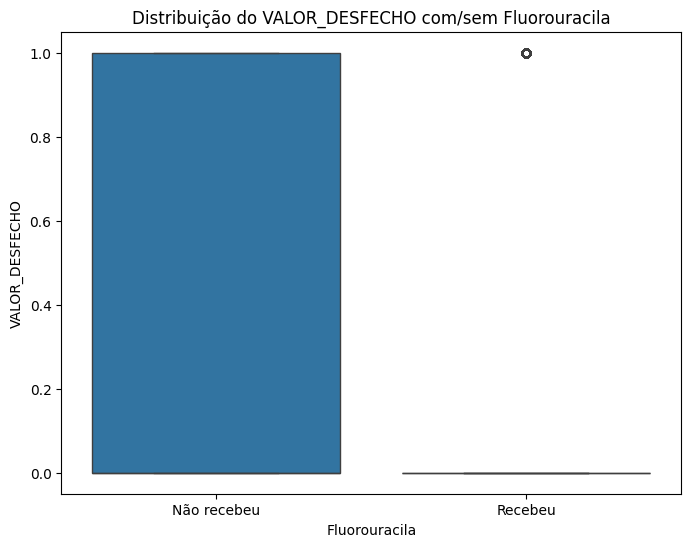

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# Média de VALOR_DESFECHO por Fluorouracila
media_fluoro = df_com_cluster.groupby('FLUOROURACILA')['VALOR_DESFECHO'].mean()
print("Média do VALOR_DESFECHO por Fluorouracila:\n", media_fluoro)

# Visualização da distribuição
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_com_cluster, x='FLUOROURACILA', y='VALOR_DESFECHO')
plt.xticks([0, 1], ['Não recebeu', 'Recebeu'])
plt.title("Distribuição do VALOR_DESFECHO com/sem Fluorouracila")
plt.ylabel("VALOR_DESFECHO")
plt.xlabel("Fluorouracila")
plt.show()


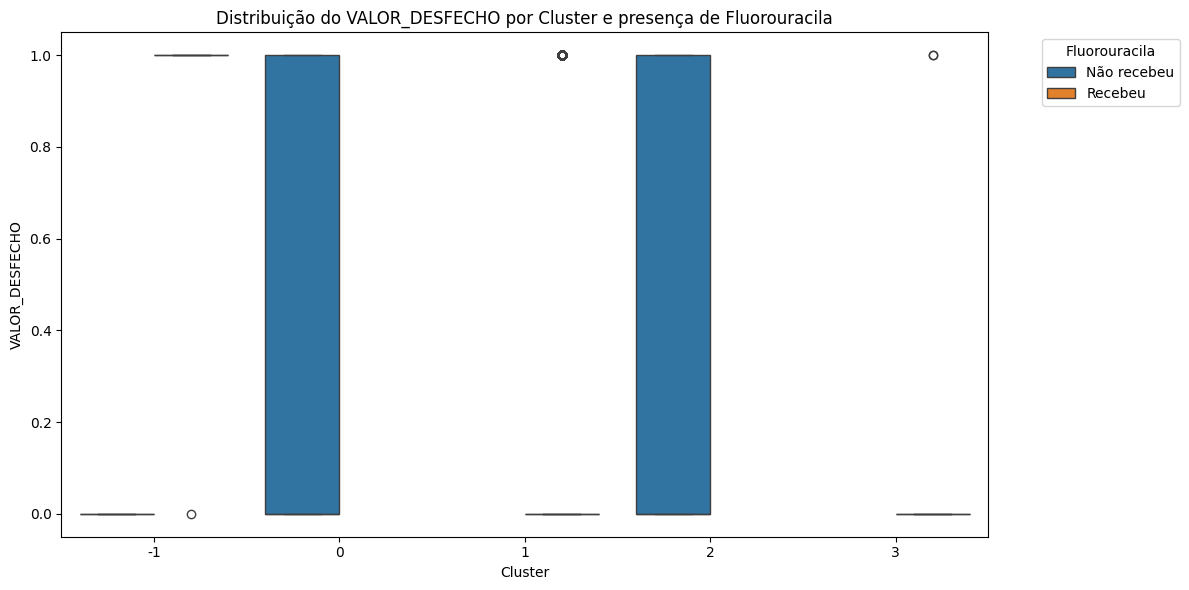

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='cluster', y='VALOR_DESFECHO', hue='FLUOROURACILA', data=df_com_cluster)

handles, labels = ax.get_legend_handles_labels()
labels = ['Não recebeu', 'Recebeu']
ax.legend(handles, labels, title='Fluorouracila', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Distribuição do VALOR_DESFECHO por Cluster e presença de Fluorouracila")
plt.xlabel("Cluster")
plt.ylabel("VALOR_DESFECHO")

plt.xticks(rotation=0)  # Ajusta a rotação do eixo X para melhor alinhamento
plt.tight_layout()      # Ajusta layout para evitar corte e desalinhamento

plt.show()


Média do VALOR_DESFECHO por AP_MOTSAI:
 AP_MOTSAI
51    0.744056
28    0.564506
21    0.323888
18    0.220721
26    0.176471
31    0.166667
15    0.159322
16    0.047619
12    0.028571
23    0.000000
11    0.000000
22    0.000000
27    0.000000
41    0.000000
42    0.000000
43    0.000000
Name: VALOR_DESFECHO, dtype: float64


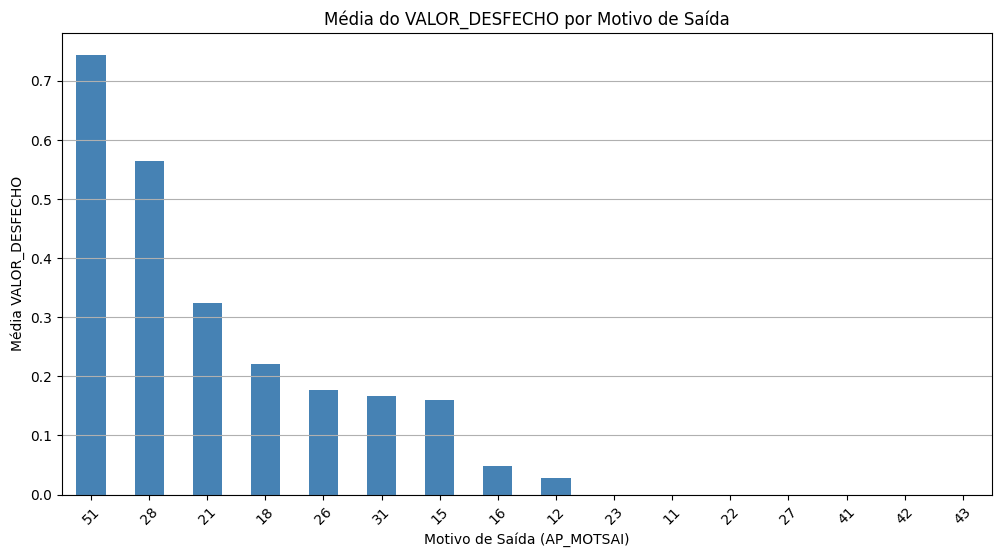

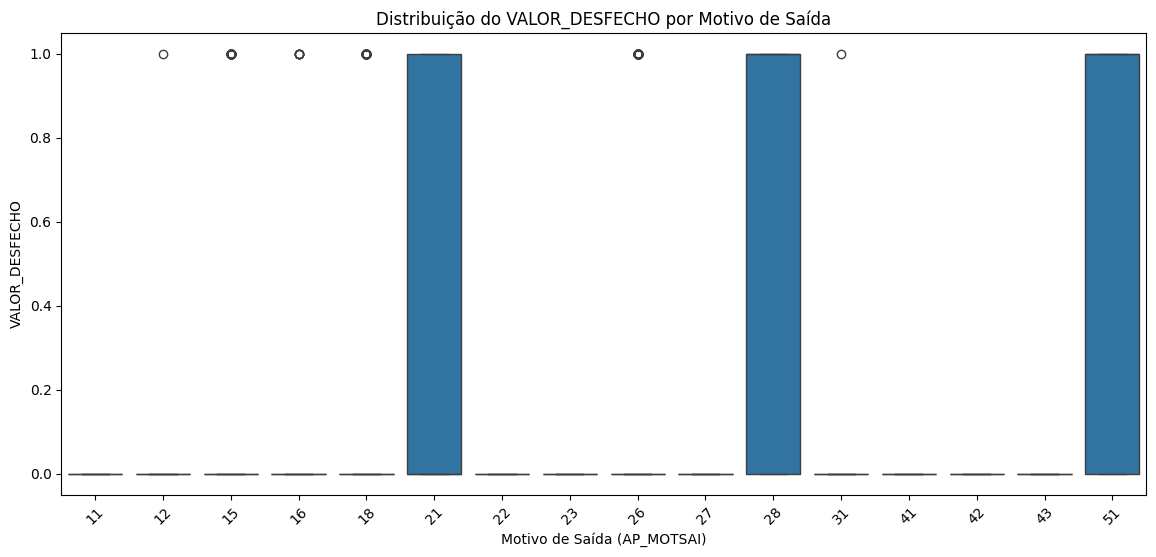

In [192]:
# Média por motivo de saída
media_motivo_saida = df_com_cluster.groupby('AP_MOTSAI')['VALOR_DESFECHO'].mean().sort_values(ascending=False)
print("Média do VALOR_DESFECHO por AP_MOTSAI:\n", media_motivo_saida)

# Visualização da média por categoria
plt.figure(figsize=(12, 6))
media_motivo_saida.plot(kind='bar', color='steelblue')
plt.title("Média do VALOR_DESFECHO por Motivo de Saída")
plt.ylabel("Média VALOR_DESFECHO")
plt.xlabel("Motivo de Saída (AP_MOTSAI)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Boxplot para visualizar distribuição
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_com_cluster, x='AP_MOTSAI', y='VALOR_DESFECHO')
plt.title("Distribuição do VALOR_DESFECHO por Motivo de Saída")
plt.xlabel("Motivo de Saída (AP_MOTSAI)")
plt.ylabel("VALOR_DESFECHO")
plt.xticks(rotation=45)
plt.show()


Acurácia treino: 1.000
Acurácia teste: 1.000


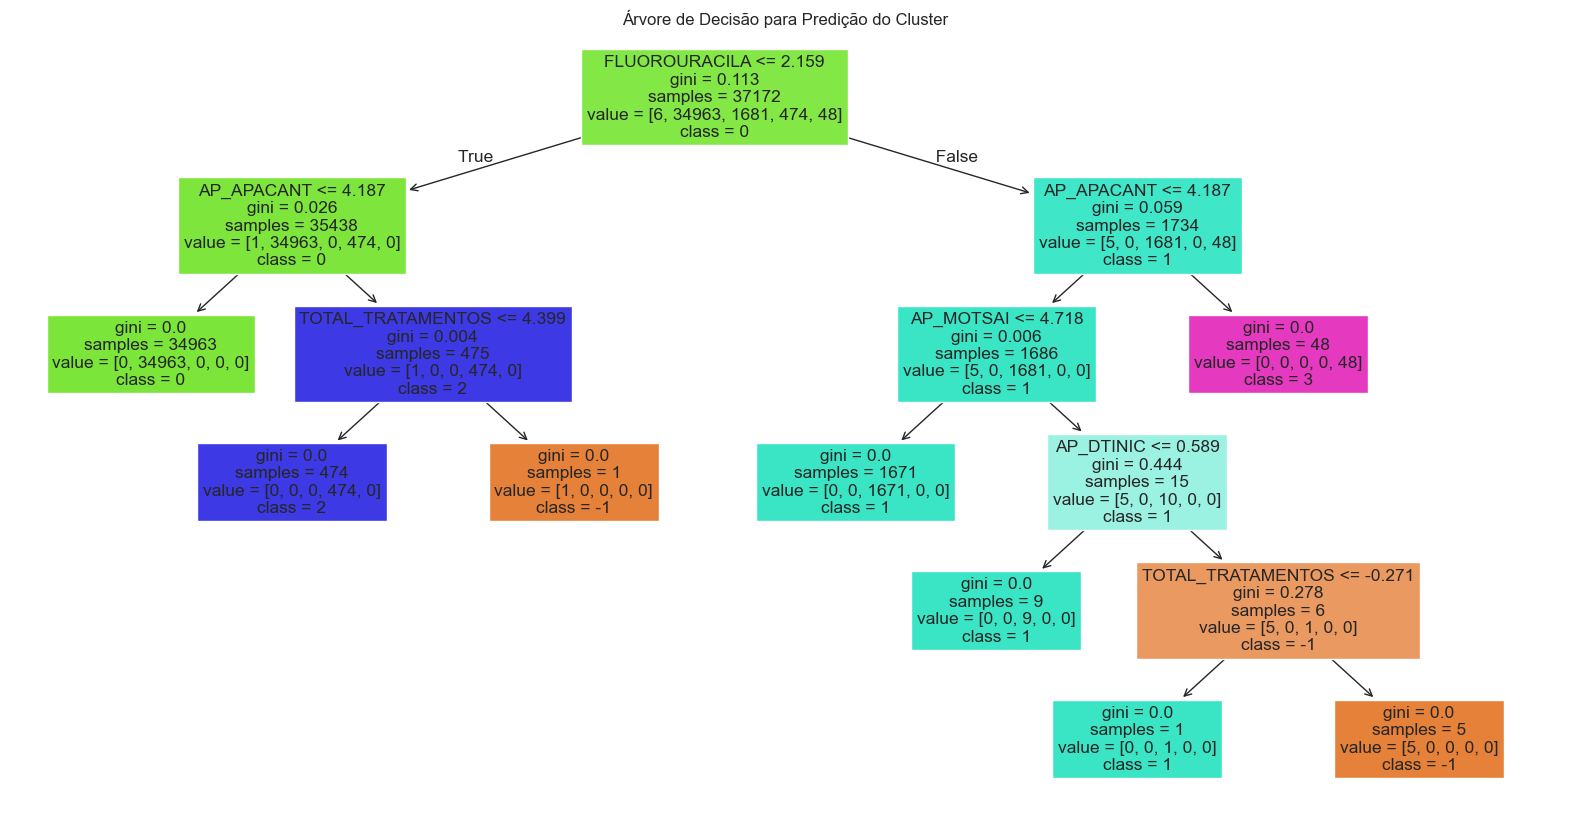

Importância das features:
 FLUOROURACILA                     0.752573
AP_APACANT                        0.244581
AP_DTINIC                         0.001189
TOTAL_TRATAMENTOS                 0.000871
AP_MOTSAI                         0.000786
AP_UFMUN_MG                       0.000000
AP_UFMUN_SP                       0.000000
PROCEDIMENTO_INICIAL_304040029    0.000000
AP_DTFIM                          0.000000
PROCEDIMENTO_INICIAL_304020133    0.000000
AQ_ESTADI                         0.000000
PROCEDIMENTO_INICIAL_304020141    0.000000
VALOR_DESFECHO                    0.000000
dtype: float64


In [215]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Preparar os dados
df_model = df_com_cluster.copy()

# Converte datas para números (timestamp em segundos)
df_model['AP_DTINIC'] = pd.to_datetime(df_model['AP_DTINIC']).astype('int64') / 1e9
df_model['AP_DTFIM'] = pd.to_datetime(df_model['AP_DTFIM']).astype('int64') / 1e9

# Variáveis para usar como features
features = [
    'AP_DTINIC',
    'AP_DTFIM',
    'PROCEDIMENTO_INICIAL_304040029',
    'AP_UFMUN_SP',
    'AP_UFMUN_MG',
    'PROCEDIMENTO_INICIAL_304020133',
    'AP_APACANT',
    'TOTAL_TRATAMENTOS',
    'AP_MOTSAI',
    'AQ_ESTADI',
    'PROCEDIMENTO_INICIAL_304020141',
    'FLUOROURACILA',
    'VALOR_DESFECHO'
]

X = df_model[features]
y = df_model['cluster']

# Escala os dados (opcional, mas recomendado para alguns algoritmos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide treino e teste para avaliar performance
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Cria o classificador de árvore de decisão
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Avalia acurácia
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print(f"Acurácia treino: {acc_train:.3f}")
print(f"Acurácia teste: {acc_test:.3f}")

# Visualiza a árvore
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=[str(c) for c in clf.classes_], filled=True)
plt.title("Árvore de Decisão para Predição do Cluster")
plt.show()

# Importância das features
importancias = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("Importância das features:\n", importancias)


Labels usados: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Class names: ['0', '1', '2', '3']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15020
           1       1.00      1.00      1.00       713
           2       1.00      1.00      1.00       187
           3       1.00      1.00      1.00        12

    accuracy                           1.00     15932
   macro avg       1.00      1.00      1.00     15932
weighted avg       1.00      1.00      1.00     15932



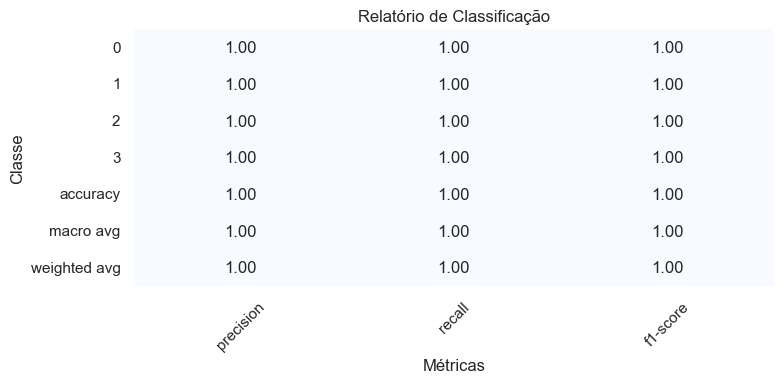

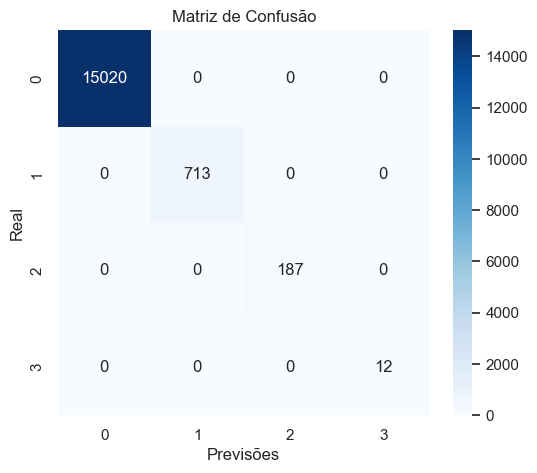

              precision  recall  f1-score  support
0                   1.0     1.0       1.0  15020.0
1                   1.0     1.0       1.0    713.0
2                   1.0     1.0       1.0    187.0
3                   1.0     1.0       1.0     12.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  15932.0
weighted avg        1.0     1.0       1.0  15932.0


In [217]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predição (ajuste esse código conforme seu modelo)
y_pred = clf.predict(X_test)

# Identifica classes presentes no teste
labels = sorted(np.unique(y_test))
class_names = [str(c) for c in labels]

print("Labels usados:", labels)
print("Class names:", class_names)

# Gera relatório com labels explícitos
print(classification_report(y_test, y_pred, labels=labels, target_names=class_names))

report = classification_report(y_test, y_pred, labels=labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).T

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
ax = sns.heatmap(
    df_report.drop('support', axis=1),
    annot=True,
    cmap="Blues",
    fmt='.2f',
    cbar=False,
    yticklabels=df_report.index,
    xticklabels=['precision', 'recall', 'f1-score']
)

plt.title('Relatório de Classificação')
plt.ylabel('Classe')
plt.xlabel('Métricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.show()

print(df_report)
